<a href="https://colab.research.google.com/github/redwankarimsony/kaggle_notebooks/blob/main/Statistical_Analysis_of_Wisconsin_Breast_Cancer_Data_(Plotly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
from google.colab import files
from IPython.display import clear_output

# Install Kaggle library
!pip install -q kaggle

# Upload the API Token file
uploaded = files.upload( )
clear_output()

Saving kaggle.json to kaggle.json


In [5]:
!cp /content/kaggle.json /root/.kaggle/

In [ ]:
%cd /content/
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

!unzip breast-cancer-wisconsin-data.zip
!rm breast-cancer-wisconsin-data.zip
!rm -r sample_data
!rm kaggle.json
clear_output()

In [66]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv('/content/data.csv')
data.drop(['Unnamed: 32','id'], axis = 1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <font color='blue'>Histogram:</font> 
How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value. Frequency = number of times each value appears
Example: `[1,1,1,1,2,2,2].` Frequency of 1 is `four` and frequency of 2 is `three.`

In [19]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Histogram(x=radius_mean_b, name = 'Benign'))
fig.add_trace(go.Histogram(x=radius_mean_m, name = 'Malignant'))

# Overlay both histograms
fig.update_layout(title = 'Histogram Comparison of radius_mean', 
                  title_x = 0.5,
                  xaxis_title ='Radius Mean Value ->',
                  yaxis_title = 'Value Counts ->',
                  barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
print(f'Mean of radius_mean values (Benign): {radius_mean_b.mean()}')
print(f'Mean of radius_mean values (Malignant): {radius_mean_m.mean()}')

Mean of radius_mean values (Benign): 12.14652380952381
Mean of radius_mean values (Malignant): 17.46283018867925


## <font color="blue">What to Conclude from Histogram Plot </font>
### &#9673;<font color = 'blue'> General Findings </font>
1. From this graph you can see that `radius_mean` of malignant tumors are bigger than `radius_mean` of benign tumors mostly.
2. The benign distribution (blue in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution). However the same is not true for the malignant class data. It concludes that, malignant class `radius_mean` is a bit erratic
3. Also you can find out that the mean value of malignant is higher than that of benign class. 


##  <font color = 'blue'> Finding Outliers </font>
1. When you are looking at histogram as you can see there are rare values in malignant distribution (red in graph)
2. There values can be errors or rare events. These errors and rare events can be called outliers
3. **Calculating outliers:**
* first we need to calculate first quartile $(Q1)(25\%)$ 
* then find `IQR(inter quartile range) = Q3-Q1`
* finally compute `Q1 - 1.5IQR` and `Q3 + 1.5IQR`
* Anything outside this range is an outlier lets write the code for bening tumor distribution for feature `radius_mean`

For visually inspecting the outliers, [Box Plot](https://plotly.com/python/box-plots/) is an excellent choice. 

In [45]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

# Calculating Qurtile Points
desc = radius_mean_b.describe()
print(desc)
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding Outliers
a = radius_mean_b[radius_mean_b < lower_bound].values 
b = radius_mean_b[radius_mean_b > upper_bound].values
outliers = np.concatenate([a,b], axis = 0)

print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
print(f'Outliers: {outliers}')

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers: [ 6.981 16.84  17.85 ]


## <font color='blue'>Box Plots:</font> 
A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

* **Minimum:** the lowest data point excluding any outliers.
* **Maximum:** the largest data point excluding any outliers.
* **Median (Q2 / 50th percentile):** the middle value of the dataset.
* **First quartile (Q1 / 25th percentile):** also known as the lower quartile $q_n(0.25)$, is the median of the lower half of the dataset.
* **Third quartile (Q3 / 75th percentile):** also known as the upper quartile $q_n(0.75)$, is the median of the upper half of the dataset.

An important element used to construct the box plot by determining the minimum and maximum data values feasible, but is not part of the aforementioned five-number summary, is the `interquartile range` or `IQR` denoted below:

**Interquartile range (IQR):** is the distance between the upper and lower quartiles.

$${\displaystyle {\text{IQR}}=Q_{3}-Q_{1}=q_{n}(0.75)-q_{n}(0.25)}$$
A boxplot is constructed of two parts, a box and a set of whiskers shown in the following figure. The lowest point is the minimum of the data set and the highest point is the maximum of the data set. The box is drawn from `Q1` to `Q3` with a horizontal line drawn in the middle to denote the median.

In [54]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Box(y=radius_mean_m, name='Malignant', marker_color = 'indianred'))
fig.add_trace(go.Box(y=radius_mean_b, name = 'Benign', marker_color = 'lightseagreen'))

fig.update_layout(title='Distribution of radius_mean for Benign and Malignant Class',
                  title_x = 0.5,
                  xaxis_title = 'Feature',
                  yaxis_title = 'Value',
                  height = 400,
                  width = 800)
fig.show()

## <font color='blue'> Summary Statistics</font>
* Mean
* Variance: spread of distribution
* Standart deviation square root of variance
* Lets look at summary statistics all the feature column in the given dataset. 

In [55]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## <font color='blue'>CDF (Cumulative Distribution Function) </font>
1. Cumulative distribution function is the probability that the variable takes a value less than or equal to x. $P(X <= x)$
2. Let's explain in cdf graph of bening radiues mean
in graph, what is $P(12 < X)$? The answer is $0.5$ obviously. 
3. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
You can plot cdf with two different method

In [64]:
def ecdf(x):
    x = np.sort(x)
    def result(v):
        return np.searchsorted(x, v, side='right') / x.size
    return result

fig = go.Figure()
fig.add_scatter(x=np.unique(radius_mean_b), 
                y=ecdf(radius_mean_b)(np.unique(radius_mean_b)), 
                line_shape='hv')

fig.update_layout(title='CDF plot for the feature radius_mean', title_x = 0.5,   
                  xaxis_title = 'Radius Mean Value',
                  yaxis_title = 'CDF',
                  height = 400, width = 600)
fig.show()

## <font color='blue'>Relationship Between Variables</font>
1. We can say that two variables are related with each other, if one of them gives information about others
For example, price and distance. If you go long distance with taxi you will pay more. Therefore, we can say that price and distance are positively related with each other.

2. Scatter Plot is the simplest way to check relationship between two variables. Let's look at the relationship between `radius_mean` and `area_mean`

3. In the following scatter plot you can see that when radius mean increases, area mean also increases Therefore, they are positively correlated with each other.

<Figure size 1080x576 with 0 Axes>

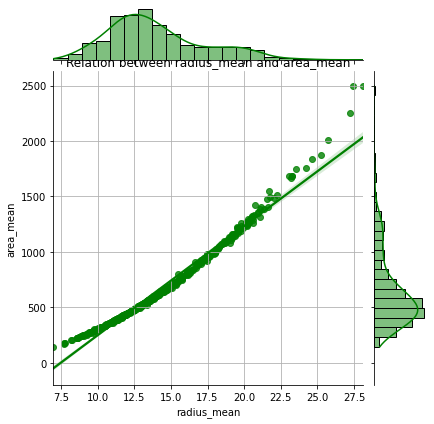

<Figure size 1080x576 with 0 Axes>

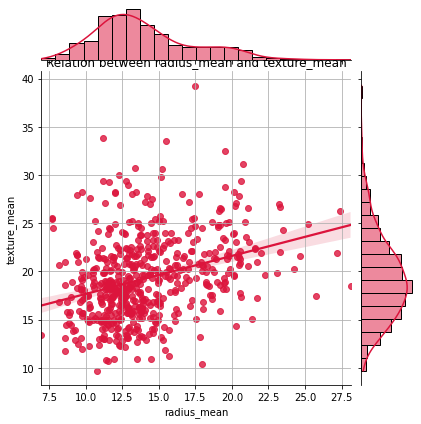

In [82]:
plt.figure(figsize = (15,8))
sns.jointplot(x = data['radius_mean'], y= data['area_mean'] ,kind="reg", color='green')
plt.title('Relation between radius_mean and area_mean')
plt.grid()
plt.show()

plt.figure(figsize = (15,8))
sns.jointplot(x = data['radius_mean'], y= data['texture_mean'] ,kind="reg", color='crimson')
plt.title('Relation between radius_mean and texture_mean')
plt.grid()
plt.show()

### &#9673; <font color='blue'>Observation:</font> 
1. Here in the first figure (green one), we see that both of the features `radius_mean` and `area_mean` are highly dependent on each other. As a result, they are positively correlated. 
2. In the second figure (pink one), both of the features are kind of independent from each other and there is little dependency among them.  